In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arxiv = pd.read_json('arxiv-metadata-oai-snapshot.json',lines=True)
arxiv.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [3]:
len(arxiv)

1934885

In [4]:
arxiv.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [5]:
categorias = arxiv['categories'][0:100]
len(categorias)
categorias.head(9)

0               hep-ph
1        math.CO cs.CG
2       physics.gen-ph
3              math.CO
4      math.CA math.FA
5    cond-mat.mes-hall
6                gr-qc
7    cond-mat.mtrl-sci
8             astro-ph
Name: categories, dtype: object

In [44]:
arxiv['update_date'] = pd.to_datetime(arxiv['update_date'])

In [19]:
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

In [21]:
frecuencias = arxiv['categories'].value_counts().to_dict()


In [26]:
filtrado = {}
for key, val in frecuencias.items():
    if val > 15000:
        filtrado[key] = val
filtrado

{'astro-ph': 86912,
 'hep-ph': 75164,
 'quant-ph': 56845,
 'hep-th': 54433,
 'cond-mat.mtrl-sci': 32145,
 'cs.CV': 31321,
 'cond-mat.mes-hall': 30972,
 'gr-qc': 26567,
 'math.AP': 26254,
 'astro-ph.SR': 24087,
 'cond-mat.str-el': 23272,
 'astro-ph.GA': 23260,
 'math.CO': 23099,
 'math.PR': 20017,
 'cs.IT math.IT': 19971,
 'astro-ph.CO': 19363,
 'astro-ph.HE': 18524,
 'nucl-th': 18089,
 'cond-mat.stat-mech': 17830,
 'math.NT': 17611,
 'math.AG': 17066,
 'hep-ex': 16138,
 'cond-mat.supr-con': 15175}

In [36]:
frecuencias['stat.ML']

1583

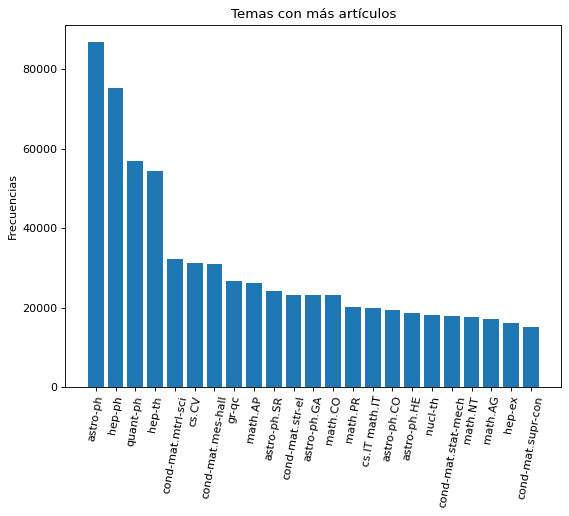

In [57]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(*zip(*filtrado.items()))
plt.title('Temas con más artículos')
plt.ylabel('Frecuencias')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 80)
plt.show()

In [32]:
category_map['hep-ph']

'High Energy Physics - Phenomenology'

In [46]:
machine = arxiv[arxiv['categories']== 'stat.ML']
machine.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
6365,0705.2363,Marten Wegkamp,Marten Wegkamp,Lasso type classifiers with a reject option,Published at http://dx.doi.org/10.1214/07-EJS0...,"Electronic Journal of Statistics 2007, Vol. 1,...",10.1214/07-EJS058,IMS-EJS-EJS_2007_58,stat.ML,None,We consider the problem of binary classifica...,"[{'version': 'v1', 'created': 'Wed, 16 May 200...",2009-09-29,"[[Wegkamp, Marten, ]]"
12185,0706.3499,Bharath Sriperumbudur,Bharath K. Sriperumbudur and Gert R. G. Lanckriet,Metric Embedding for Nearest Neighbor Classifi...,"9 pages, 1 table",None,None,None,stat.ML,None,The distance metric plays an important role ...,"[{'version': 'v1', 'created': 'Sun, 24 Jun 200...",2007-06-26,"[[Sriperumbudur, Bharath K., ], [Lanckriet, Ge..."
16706,0707.3536,Patrick Erik Bradley,Patrick Erik Bradley,Degenerating families of dendrograms,"13 pages, 8 figures","J. Classif. 25, 27-42 (2008)",10.1007/s00357-008-9009-5,None,stat.ML,None,Dendrograms used in data analysis are ultram...,"[{'version': 'v1', 'created': 'Tue, 24 Jul 200...",2008-06-28,"[[Bradley, Patrick Erik, ]]"
17242,0707.4072,Patrick Erik Bradley,Patrick Erik Bradley,Families of dendrograms,"7 pages, 3 figures. To appear in: Proceedings ...",None,10.1007/978-3-540-78246-9_12,None,stat.ML,None,A conceptual framework for cluster analysis ...,"[{'version': 'v1', 'created': 'Fri, 27 Jul 200...",2009-12-01,"[[Bradley, Patrick Erik, ]]"
20228,0708.2377,Roberto Alamino,"Roberto C. Alamino, Nestor Caticha",Online Learning in Discrete Hidden Markov Models,"8 pages, 6 figures",None,10.1063/1.2423274,None,stat.ML,None,We present and analyse three online algorith...,"[{'version': 'v1', 'created': 'Fri, 17 Aug 200...",2007-08-20,"[[Alamino, Roberto C., ], [Caticha, Nestor, ]]"


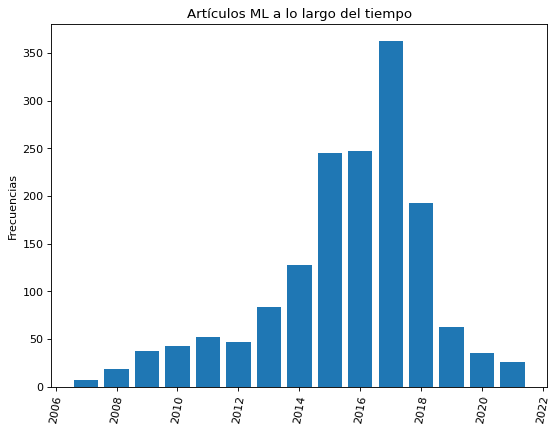

In [58]:
años = machine['update_date'].dt.year.value_counts().to_dict()
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(*zip(*años.items()))
ax = plt.gca()
plt.title('Artículos ML a lo largo del tiempo')
plt.ylabel('Frecuencias')
ax.tick_params(axis='x', labelrotation = 80)
plt.show()